In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm
from scipy.special import gamma as gamma_func
import seaborn as sns

# Fig S8

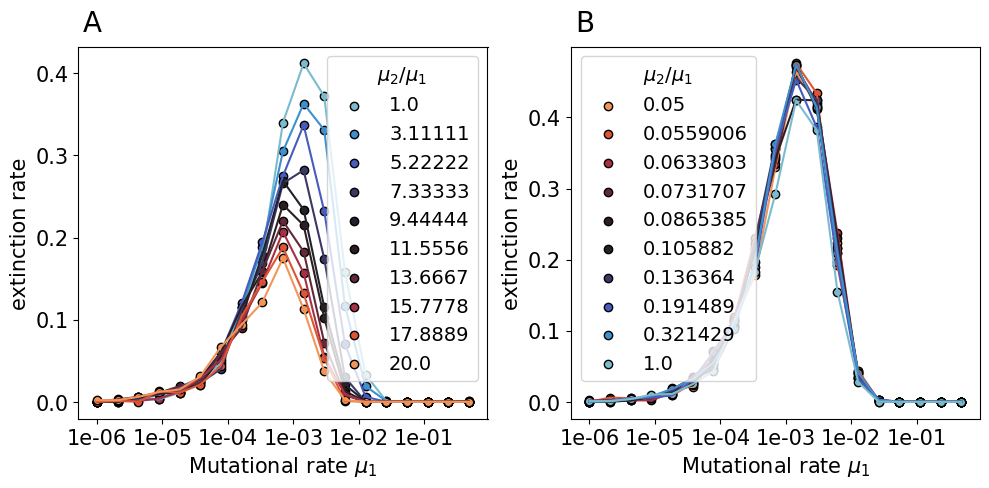

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplot(1,2,1)

df = pd.read_csv('Parameters sensitivity/Mutational rates/ext_rate_mu.csv')
df['Dead'] = df['FinalTime'] < 150
dfext = df.groupby(['SeasonLength','mu1','R','Dead']).count().reset_index()
dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000
dfext = dfext[dfext['mu1']!=1]

orden = sorted(dfext['R'].unique(), reverse=True)
colors = sns.color_palette('icefire_r',len(orden))
special_palette=dict(zip(orden,colors))

for u,dfu in dfext.groupby('R'):
    plt.plot(np.log10(dfu['mu1']), dfu['ExtRate'],color=special_palette[u])
    plt.scatter(np.log10(dfu['mu1']), dfu['ExtRate'], ec='black',label=str(u),color=special_palette[u])
plt.legend(title=r'$\mu_2 / \mu_1$',fontsize=14, title_fontsize=14)

plt.yticks(fontsize=15)
plt.xlabel('Mutational rate '+r'$\mu_1$',fontsize=15)
plt.ylabel('Extinction rate',fontsize=15)
plt.xticks([-6,-5,-4,-3,-2,-1],[10**-6, 10**-5, '1e-04', '1e-03', '1e-02', '1e-01'],fontsize=15)
plt.ylabel('extinction rate',fontsize=15)

#-----------------------------------------------------------------------------
plt.subplot(1,2,2)

dfr = pd.read_csv('Parameters sensitivity/Mutational rates/ext_rate_mu_reverse.csv')
dfr['Dead'] = dfr['FinalTime'] < 150
dfextr = dfr.groupby(['SeasonLength','mu1','R','Dead']).count().reset_index()
dfextr = dfextr[dfextr['Dead']==False]
dfextr['ExtRate'] = 1 - dfextr['Trajectory'] / 1000

dfextr = dfextr[dfextr['mu1']!=1]

orden = sorted(dfextr['R'].unique(), reverse=True)
colors = sns.color_palette('icefire',len(orden))
special_palette=dict(zip(orden,colors))

for u,dfu in dfextr.groupby('R'):
    plt.plot(np.log10(dfu['mu1']), dfu['ExtRate'],color=special_palette[u])
    plt.scatter(np.log10(dfu['mu1']), dfu['ExtRate'], ec='black',label=str(u),color=special_palette[u])
plt.legend(title=r'$\mu_2 / \mu_1$',fontsize=14, title_fontsize=14)

plt.yticks(fontsize=15)
plt.xlabel('Mutational rate '+r'$\mu_1$',fontsize=15)
plt.ylabel('Extinction rate',fontsize=15)
plt.xticks([-6,-5,-4,-3,-2,-1],[10**-6, 10**-5, '1e-04', '1e-03', '1e-02', '1e-01'],fontsize=15)
plt.ylabel('extinction rate',fontsize=15)

# Aplanar el array de ejes si es 2D
axes = axes.flatten()
# Letras A, B, C, ...
letters = ['A','B','C','D','E','F']

for i, ax in enumerate(axes):
    # Agrega la letra en la esquina superior izquierda de cada subplot
    ax.text(
        0.01, 1.1, letters[i],                # posición relativa en el eje (0,0 es abajo izquierda)
        transform=ax.transAxes,                # usa coordenadas relativas al eje
        fontsize=20, va='top'
    )
    
plt.tight_layout()
#plt.savefig('Figsupp-sensibilidadtasasmutacon.png',dpi=300)
plt.show()

**Effect of changes in mutation rates.** The extinction probability exhibits a non-monotonic dependence on the baseline mutation rate ($\mu_1$), peaking at intermediate values. The ratio between mutation rates ($\mu_2/\mu_1$, shown in color) modulates the peak height and position. Simulations with $\tau=50$, $t_{\text{end}}=150$, $t_{\text{end treatment}}=100$, $\text{number of trajectories}=1000$.

# Fig S9

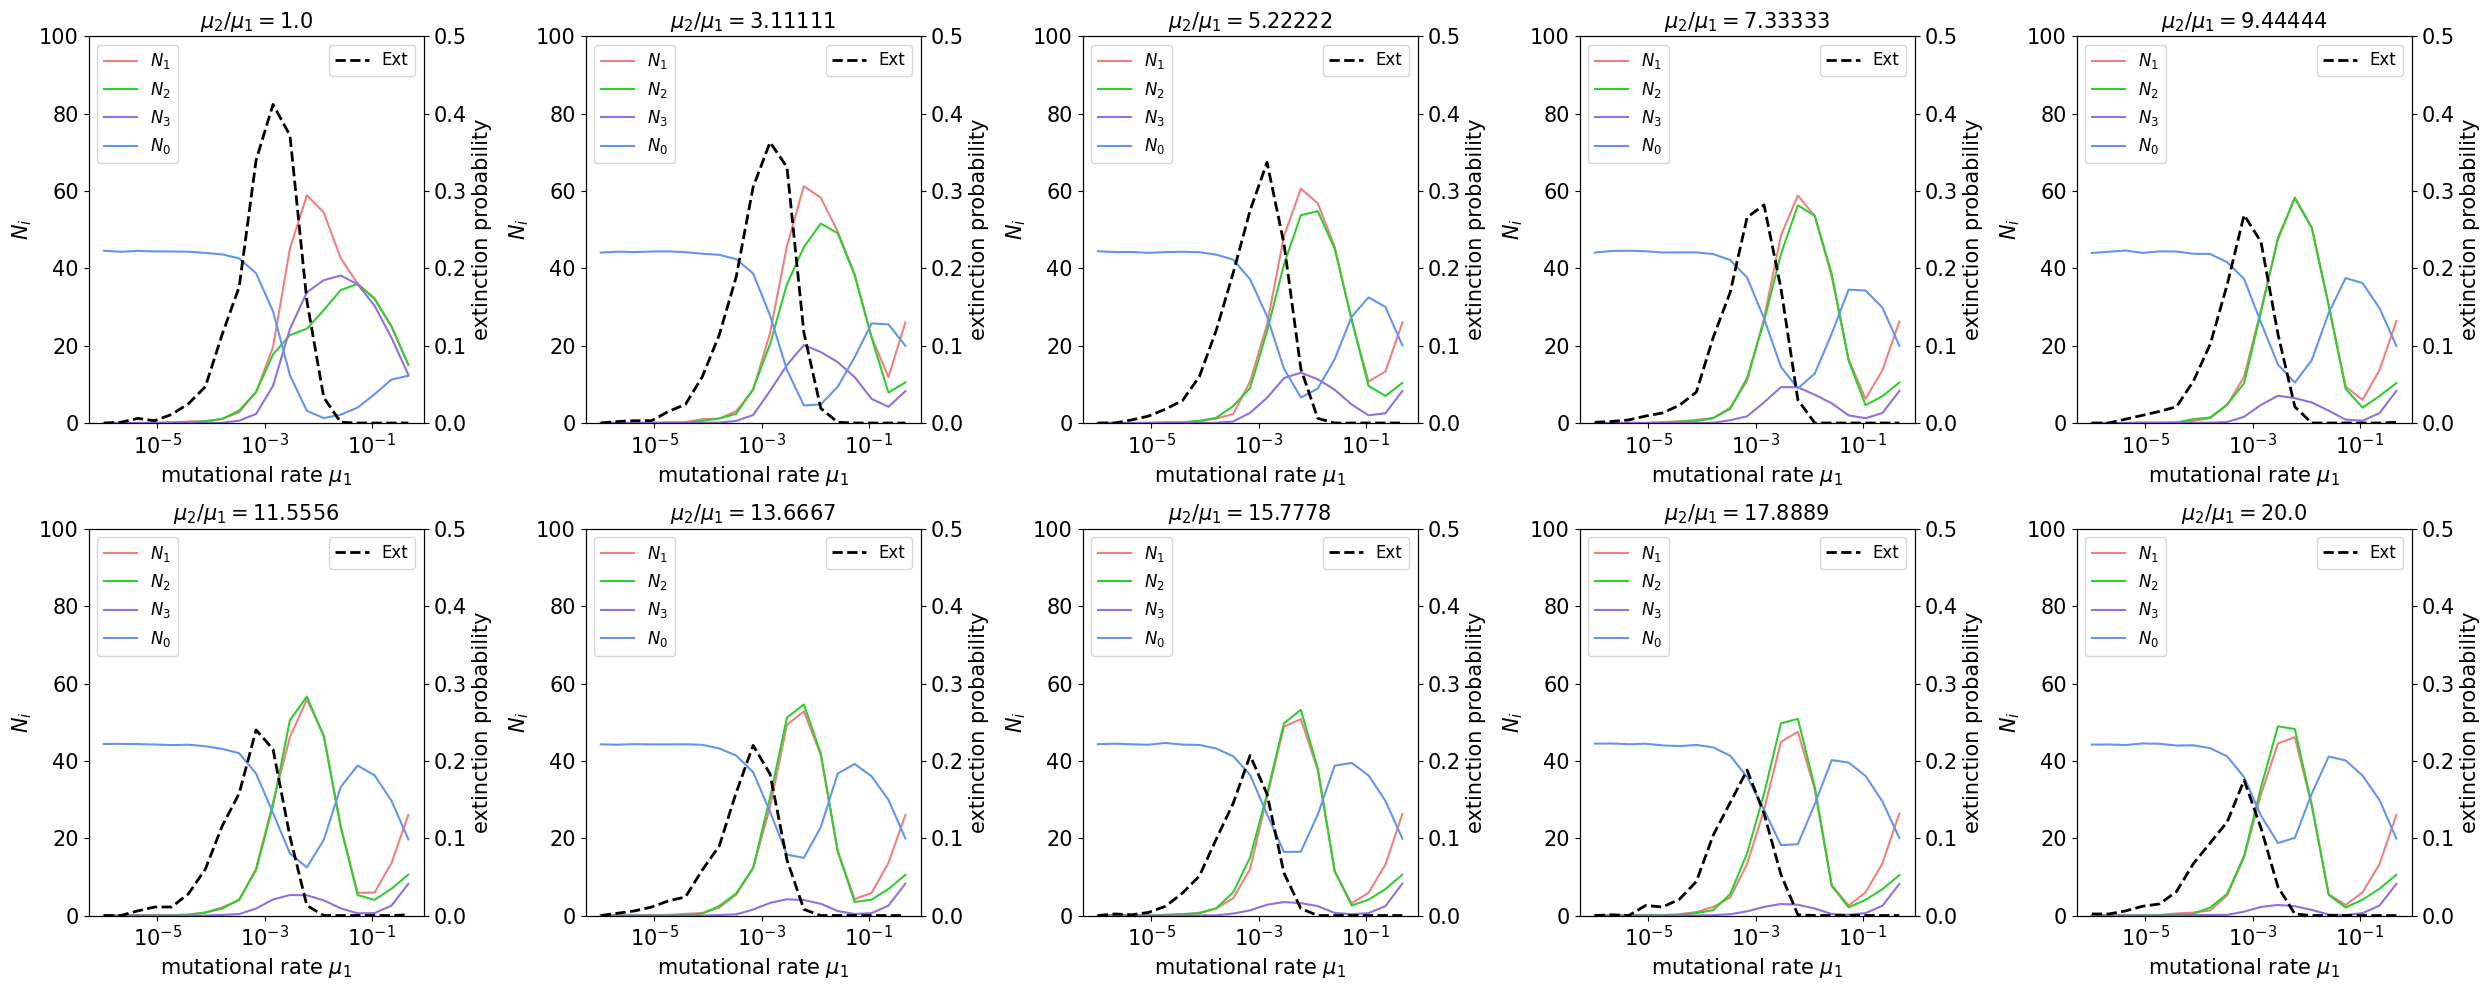

In [7]:
df = pd.read_csv('Parameters sensitivity/Mutational rates/trajectories_mu.csv')
dfE = pd.read_csv('Parameters sensitivity/Mutational rates/ext_rate_mu.csv')

bins = [-float("inf"), 50, 100.1, 150, float("inf")]
labels = [0, 50, 100.1, 150]
dfE["Time"] = pd.cut(dfE["FinalTime"], bins=bins, labels=labels)

df = df.merge(dfE,on=['mu1','R','Trajectory','Time','SeasonLength'],how='outer')

df['FinalTime'] = df['FinalTime'].replace({np.nan:True,150.1:True})
df = df[df['FinalTime']==True]
df = df.dropna()

df1 = df[df['Time']==50].groupby(['mu1','R']).mean().reset_index()
df2 = df[df['Time']==100.1].groupby(['mu1','R']).mean().reset_index()
df3 = df.groupby(['mu1','R']).mean().reset_index()

dfpop = df1[['mu1','R','x1']].merge(df2[['mu1','R','x2']],on=['mu1','R'])
dfpop = dfpop.merge(df3[['mu1','R','x3','x0']],on=['mu1','R'])


#dfE = pd.read_csv('ext_rate_mu.csv')
dfE['Dead'] = dfE['FinalTime'] < 150
dfext = dfE.groupby(['SeasonLength','mu1','R','Dead']).count().reset_index()
dfext = dfext[dfext['Dead']==False]
dfext['ExtRate'] = 1 - dfext['Trajectory'] / 1000
dfext = dfext[dfext['mu1']!=1]
dfext

dfpop = dfpop.merge(dfext[['mu1','R','ExtRate']])


# Cantidad de grupos
grupos = list(dfpop.groupby('R'))
n = len(grupos)

# Creamos figura con 2 filas y 5 columnas
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

for i, (u, dfu) in enumerate(grupos):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # Curvas en ax1
    ax1.plot(dfu['mu1'], dfu['x1'], label='$N_1$', color='lightcoral')
    ax1.plot(dfu['mu1'], dfu['x2'], label='$N_2$', color='limegreen')
    ax1.plot(dfu['mu1'], dfu['x3'], label='$N_3$', color='mediumpurple')
    ax1.plot(dfu['mu1'], dfu['x0'], label='$N_0$', color='cornflowerblue')
    ax1.set_ylim(0, 100)
    ax1.set_xscale('log')
    ax1.legend(loc='upper left', fontsize=12)

    # Curva en ax2
    ax2.plot(dfu['mu1'], dfu['ExtRate'], label='Ext',
             color='black', linestyle='--', linewidth=2)
    ax2.set_ylim(0, 0.5)
    ax2.legend(loc='upper right', fontsize=12)

    # Títulos y etiquetas con fontsize=15
    ax1.set_title(r'$\mu_2 / \mu_1 = $'+str(u), fontsize=15)
    ax1.set_xlabel("mutational rate "+r'$\mu_1$', fontsize=15)
    ax1.set_ylabel(r"$N_i$", fontsize=15)
    ax2.set_ylabel("extinction probability", fontsize=15)

    # Ticks fontsize=15
    ax1.tick_params(axis='both', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)

# Ocultar ejes vacíos si hay menos de 10 grupos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('supp-popratios.png',dpi=300)
plt.show()

**Effect of changes in mutation rates.** Mean population composition prior to the switch for trajectories that do not go extinct (colored lines), superimposed with the extinction probability (black dashed line). The decline of the extinction peak coincides with the emergence of the double-resistant strain and with the recovery of the susceptible strain, the latter becoming more pronounced as $\mu_2$ increases relative to $\mu_1$. Simulations with $\tau=50$, $t_{\text{end}}=150$, $t_{\text{end treatment}}=100$, $\text{number of trajectories}=1000$.